In [17]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [18]:
# loading data
csvpath = Path('../Project-03/teamGameStats.csv')
teamstats_df = pd.read_csv(csvpath)

In [19]:
# dropping unneeded columns
# subsequent analysis dropped '+/-' and 'PTS' columns
#teamstats_df = teamstats_df.drop(columns=['TEAM','MATCHUP','GAMEDATE','+/-','PTS'])

In [20]:
# defining 'W/L' column as feature set
X = teamstats_df.copy()
X.drop('W/L', axis=1, inplace=True)
X.head(16)

,TEAM,TEAM1,H/A,TEAM2,GAMEDATE,MIN,PTS,FGM,FGA,FG%,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,ATL,ATL,vs,IND,4/18/2021,48,129,45,92,48.9,...,76.5,14,37,51,20,10,8,7,19,12
1,CHA,CHA,vs,POR,4/18/2021,48,109,39,83,47.0,...,76.5,7,39,46,26,14,6,8,25,8
2,NOP,NOP,@,NYK,4/18/2021,53,112,41,101,40.6,...,80.0,20,32,52,25,13,6,4,16,-10
3,MIA,MIA,vs,BKN,4/18/2021,48,109,38,87,43.7,...,81.0,16,37,53,28,17,9,1,13,2
4,POR,POR,@,CHA,4/18/2021,48,101,36,91,39.6,...,67.9,13,34,47,18,9,7,3,17,-8
5,OKC,OKC,@,TOR,4/18/2021,48,106,37,82,45.1,...,85.7,9,37,46,22,23,6,8,19,-6
6,MIN,MIN,@,LAC,4/18/2021,48,105,36,88,40.9,...,76.2,6,31,37,27,11,6,7,21,-19
7,ORL,ORL,vs,HOU,4/18/2021,48,110,41,91,45.1,...,89.5,9,27,36,28,15,10,5,19,-4
8,TOR,TOR,vs,OKC,4/18/2021,48,112,37,96,38.5,...,87.5,16,31,47,23,15,9,5,15,6
9,IND,IND,@,ATL,4/18/2021,48,117,45,92,48.9,...,85.0,8,33,41,33,12,7,5,27,-12


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 13658 entries, ('ATL', 'ATL') to ('DET', 'DET')
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TEAM      13658 non-null  object 
 1   MATCHUP   13658 non-null  object 
 2   GAMEDATE  13658 non-null  object 
 3   MIN       13658 non-null  int64  
 4   PTS       13658 non-null  int64  
 5   FGM       13658 non-null  int64  
 6   FGA       13658 non-null  int64  
 7   FG%       13658 non-null  float64
 8   3PM       13658 non-null  int64  
 9   3PA       13658 non-null  int64  
 10  3P%       13658 non-null  float64
 11  FTM       13658 non-null  int64  
 12  FTA       13658 non-null  int64  
 13  FT%       13658 non-null  float64
 14  OREB      13658 non-null  int64  
 15  DREB      13658 non-null  int64  
 16  REB       13658 non-null  int64  
 17  AST       13658 non-null  int64  
 18  TOV       13658 non-null  int64  
 19  STL       13658 non-null  int64  
 20  BLK   

In [10]:
# defining target vector
y=teamstats_df['W/L'].values.reshape(-1,1)
# defining target vector
#y=teamstats_df['W/L'].ravel()
y[:5]

array([['W'],
       ['W'],
       ['L'],
       ['W'],
       ['L']], dtype=object)

In [11]:
# converting 'W/L' to 0/1's
y=teamstats_df['W/L'].apply(lambda x: 1 if x=="W" else 0)
y[:5]

ATL  ATL    1
CHA  CHA    1
NOP  NOP    0
MIA  MIA    1
POR  POR    0
Name: W/L, dtype: int64

In [12]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [13]:
# Creating StandardScaler instance
#scaler = StandardScaler()

# Fitting Standard Scaller
#X_scaler = scaler.fit(X_train)

In [14]:
# Scaling data
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=40, random_state=78)

In [16]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)
#rf_model = rf_model.fit(X_train_scaled, y_train)

ValueError: could not convert string to float: '@'

In [ ]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test)
#predictions = rf_model.predict(X_test_scaled)

In [68]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [69]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1402,302
Actual 1,353,1358


Accuracy Score : 0.808199121522694
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1704
           1       0.82      0.79      0.81      1711

    accuracy                           0.81      3415
   macro avg       0.81      0.81      0.81      3415
weighted avg       0.81      0.81      0.81      3415



In [70]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

In [71]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.16324602370824753, 'FG%'),
 (0.1035121710032548, 'DREB'),
 (0.08838890267050263, '3P%'),
 (0.08591673801060551, 'REB'),
 (0.06216537131183205, 'FGM'),
 (0.05526690548104853, 'STL'),
 (0.048157394200162656, 'TOV'),
 (0.04744809186092701, 'FT%'),
 (0.04294880798085348, 'FGA'),
 (0.042944041891899105, 'FTM'),
 (0.04064383417271803, 'PF'),
 (0.040557865647454214, 'AST'),
 (0.03897906953560751, 'FTA'),
 (0.03502998110433049, '3PA'),
 (0.03375642587485267, 'BLK'),
 (0.03326223513259829, '3PM'),
 (0.030925400216172856, 'OREB'),
 (0.006850740196932603, 'MIN')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

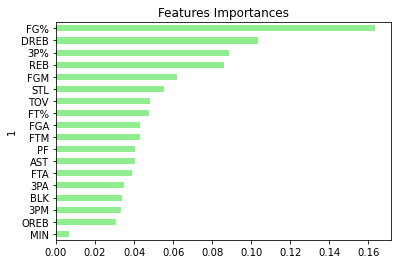

In [72]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)